In [ ]:
###############################################################################
# LeNet flow first implemented in Python with random weight and bias values. This flow will be replicated in Verilog


(313, 525, 4)
(313, 525)
Resized Dimensions :  (32, 32, 4) (32, 32)


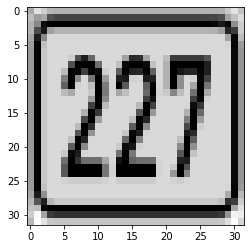

In [91]:
%matplotlib inline
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
img = mpimg.imread(r'C:\Users\jujare\Desktop\kushal\Peashon\HWaccel\IMAGE.PNG') 
plt.imshow(img)

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
gray = rgb2gray(img)

import cv2
#img = cv2.imread(r'C:\Users\jujare\Desktop\kushal\personal\a.jpg', cv2.IMREAD_UNCHANGED)

#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dimensions = img.shape
d1 = gray.shape
print(dimensions)
print(d1)
scale_value = 32 # percent of original size
width = int(img.shape[1] * scale_value / 525)
height = int(img.shape[0] * scale_value / 313)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
resized_gray1 = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA) 
print('Resized Dimensions : ',resized.shape, resized_gray1.shape)
#plt.imshow(resized)
#plt.imshow(img)
plt.imshow(resized_gray1, cmap = plt.cm.gray)

In [92]:
import numpy as np

#image = np.random.randint(1,9,size=(3,227,227))
def conv(I, S, P, kernel, Ci, Co):
    X = len(I[0])
    I = np.pad(I,((P,P),(P,P),(0,0)), mode='constant', constant_values=0)
    Xp = len(I[0])
    print(I.shape)
    k = len(kernel[0])
    print(int(k/2))
    Op = int(((X-k+2*P)/S) + 1)
    output_val = np.zeros((Op,Op,Co))
    for d in range(Co):
        #kernel = np.random.randint(1,3,size=(k,k,Ci))
        O = Xp-k
        for o1,op1 in zip(range(0,O,S), range(Op)):
            for o2,op2 in zip(range(0,O,S), range(Op)):
                for c in range(Ci):
                    for i in range(k):
                        for j in range(k):
                            #if (j+o2 <= O-1 + k-1):
                            #print (d, op1, op2, c, i,o1, j,o2)
                            output_val[op1][op2][d] = I[i+o1][j+o2][c] * kernel[i][j][c] + output_val[op1][op2][d]
    print (op1, op2, d, i+o1, j+o2,c)
    return output_val

In [93]:
resized_gray = resized_gray1[:, :, None] # adding 3rd dimension 
print(resized_gray.max())
print(resized_gray.shape)

0.87894565
(32, 32, 1)


In [94]:
import torch
from numpy import array, newaxis, expand_dims
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")
# construct the Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")
laplacian = array(laplacian)[:, :, newaxis]
sobelX = array(sobelX)[:, :, newaxis]
sobelY = array(sobelY)[:, :, newaxis]
print(laplacian.shape, resized_gray.shape, resized.shape[2])
K1 = np.random.randint(1,3,size=(5,5,resized.shape[2]))
test = conv(I=resized_gray, S=1, P=0, kernel=K1, Ci=resized_gray.shape[2], Co=6)
#test = conv(I=resized_gray, S=1, P=0, kernel=laplacian, Ci=resized_gray.shape[2], Co=1)
print(test.shape)

(3, 3, 1) (32, 32, 1) 4
(32, 32, 1)
2
26 26 5 30 30 0
(28, 28, 6)


In [95]:
test_hori = test
print((test_hori.max()))
print(test.shape)
#print(a1.shape)

28.359922528266907
(28, 28, 6)


(28, 28, 6)
(28, 28)


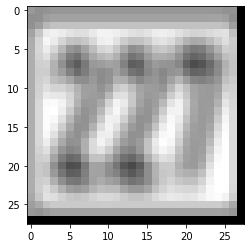

In [96]:
print(test_hori.shape)
test_o = test[:,:,0]
print(test_o.shape)
im = torch.from_numpy(test_o)
plt.imshow(im, cmap = plt.cm.gray)
#plt.imshow(im)

In [97]:
def maxpool(I, S, k):
    P = 0
    I = np.pad(I,((0,P),(0,P),(0,0)), mode='constant', constant_values=0)
    X = I.shape[0]
    Ci = I.shape[2]
    Co = I.shape[2]
    Op = int(((X-k+2*P)/S) + 1)
    output_val = np.zeros((Op,Op,Co))
    #print(output_val.shape)
    for d in range(Co):
        #kernel = np.random.randint(1,3,size=(k,k,Ci))
        O = X-k
        #print(O)
        for o1,op1 in zip(range(0,O,S), range(0,Op)):
            for o2,op2 in zip(range(0,O,S), range(0,Op)):
                max_list = []
                for c in range(Ci):
                    for i in range(k):
                        for j in range(k):
                            max_list.append(I[i+o1][j+o2][c])
                #print(op1, op2,d,i+o1,j+o2,c)
                output_val[op1][op2][d] = np.max(max_list)
    print(op1, op2,d,i+o1,j+o2,c)
    return output_val

In [98]:
#maxpool1 = conv(I=conv1, S=2, P=0, k=3, Ci=96, Co=96)
#print(conv1.shape[2])
#test_p = test_o[:, :, newaxis]
#print(test_p.shape)
maxpool1 = maxpool(I=test_hori, S=2, k=2)
print(maxpool1.shape)

12 12 5 25 25 5
(14, 14, 6)


(14, 14, 6)


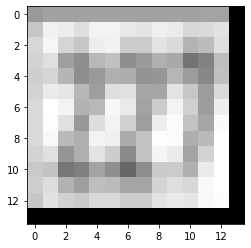

In [99]:
print(maxpool1.shape)
maxpool1_o = maxpool1[:,:,0]
plt.imshow(maxpool1_o, cmap = plt.cm.gray)

In [100]:
K3 = np.random.randint(1,3,size=(5,5,maxpool1.shape[2]))
#conv2 = conv(I=maxpool1, S=1, P=2, kernel=K3, Ci=maxpool1.shape[2], Co=256)
#print(conv2.shape)
conv2 = conv(I=maxpool1, S=1, P=0, kernel=K3, Ci=maxpool1.shape[2], Co=16)
print(conv2.shape)

(14, 14, 6)
2
8 8 15 12 12 5
(10, 10, 16)


(10, 10)


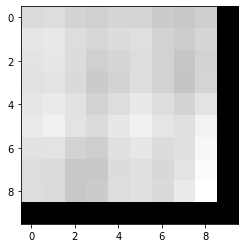

In [101]:
conv2_o = conv2[:,:,0]
print(conv2_o.shape)
plt.imshow(conv2_o, cmap = plt.cm.gray)

In [102]:
print(conv2.shape)
maxpool2 = maxpool(I=conv2, S=2, k=2)
print(maxpool2.shape)

(10, 10, 16)
3 3 15 7 7 15
(5, 5, 16)


(5, 5, 16)
(5, 5)


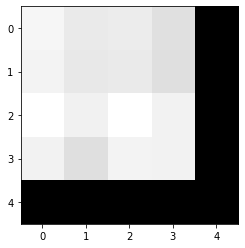

In [103]:
print(maxpool2.shape)
maxpool2_o = maxpool2[:,:,0]
print(maxpool2_o.shape)
plt.imshow(maxpool2_o, cmap = plt.cm.gray)

In [69]:
def flatten(I):
    O = []
    for DEPTH in range(len(I)):
        for ROW in range(len(I[0])):
            for COLUMN in range(len(I[0][0])):
                O.append(I[DEPTH][ROW][COLUMN])
    return O

In [74]:
#image = np.random.randint(1,9,size=(4,3,2))
flat = flatten(maxpool2)
print(len(flat))

400


In [75]:
def fc(Li, W1, Lo, B):
    O = list(range(Lo))
    for i in range(Lo):
        for j in range(len(Li)):
            O[i] = Li[j]*W1[j] + O[i]
            #print(O[i])
        O[i] = O[i] + B[i]
        #print(O[i], Li[j], W1[j], B[i])
    return O

In [77]:
W1 = np.full_like(flat, 1)
B1 = np.ones(120)

fc1 = fc(flat, W1, 120, B1)
print (len(fc1))
#print(fc1)

120


In [79]:
W2 = np.full_like(fc1, 1)
B2 = np.ones(84)
fc2 = fc(fc1, W2, 84, B2)
print(len(fc2))

84


In [83]:
W3 = np.full_like(fc2, 1)
B3 = np.ones(10)
Output = fc(fc2, W3, 10, B3)
print(len(Output))
print(Output)

10
[13663996091.854572, 13663996092.854572, 13663996093.854572, 13663996094.854572, 13663996095.854572, 13663996096.854572, 13663996097.854572, 13663996098.854572, 13663996099.854572, 13663996100.854572]


In [82]:
print(np.max(Output))
print(np.argmax(Output))

13663996100.854572
9


In [104]:
########################################################################
# The above logic is replicated in the Verilog code, with trained weight, biased values

resized_verilog2 = resized_gray1 #(81*81)

In [107]:
print(resized_verilog2.shape)
resized_verilog2 
# change to int then to hex and send to verilog, then take op.. and compare with op here with 1 conv.

(32, 32)


array([[0.58562446, 0.78307295, 0.70628047, ..., 0.69175917, 0.7790445 ,
        0.6685069 ],
       [0.65224475, 0.5383559 , 0.57968765, ..., 0.56469893, 0.66516906,
        0.75501245],
       [0.6134785 , 0.4715301 , 0.04236104, ..., 0.02175822, 0.48919564,
        0.7069952 ],
       ...,
       [0.6725164 , 0.6510704 , 0.03196159, ..., 0.00988463, 0.57212245,
        0.7670431 ],
       [0.70632845, 0.8629229 , 0.56639504, ..., 0.5118845 , 0.83412814,
        0.81251776],
       [0.6301223 , 0.87894565, 0.7841373 , ..., 0.7633673 , 0.87684005,
        0.72834784]], dtype=float32)

In [113]:
resized_verilog1 = resized_verilog2.round() # round off to nearest int value
resized_verilog1 = np.array(resized_verilog1, dtype='int') # pass this matrix to verilog (IMD)
print(resized_verilog1[0:10])
#print(resized_verilog1)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1]
 [1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1]
 [1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1]]


(32, 32)


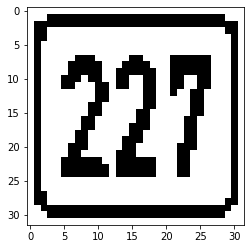

In [117]:
print(resized_verilog1.shape)
plt.imshow(resized_verilog1, cmap = plt.cm.gray)

(3, 3, 1)
(32, 32, 1)
1
28 28 0 30 30 0
(30, 30, 1)
(30, 30)
[[7. 6. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 2. 6. 0.]
 [2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 0.]
 [1. 1. 6. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
  7. 7. 7. 6. 2. 0.]
 [1. 2. 7. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
  8. 8. 8. 8. 6. 0.]
 [2. 6. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
  8. 8. 8. 8. 7. 0.]
 [2. 7. 8. 8. 8. 8. 7. 7. 7. 8. 8. 8. 8. 8. 7. 7. 8. 8. 8. 8. 7. 7. 7. 7.
  7. 7. 8. 8. 7. 0.]
 [2. 7. 8. 8. 8. 6. 2. 1. 2. 6. 8. 8. 8. 6. 2. 2. 6. 8. 8. 7. 2. 1. 1. 1.
  1. 2. 7. 8. 7. 0.]
 [2. 7. 8. 8. 7. 2. 0. 0. 0. 2. 7. 8. 6. 2. 0. 0. 2. 6. 8. 7. 1. 0. 0. 0.
  0. 1. 7. 8. 7. 0.]
 [2. 7. 8. 8. 6. 1. 0. 1. 0. 1. 7. 7. 2. 0. 1. 1. 0. 2. 7. 7. 1. 0. 1. 1.
  0. 1. 7. 8. 7. 0.]
 [2. 7. 8. 7. 2. 0. 2. 5. 2. 1. 6. 7. 1. 1. 6. 6. 1. 1. 7. 7. 1. 1. 6. 6.
  1. 1. 7.

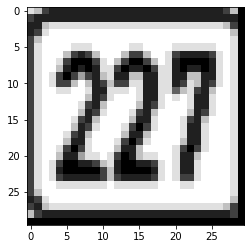

In [122]:
resized_verilog = resized_verilog1[:, :, None] # adding 3rd dimension 
laplacian_verilog1 = np.array(( # pass all these 3 matrices to verilog separately and check.
    [0, 1, 0],
    [1, 4, 1],
    [0, 1, 0]), dtype="int")
# construct the Sobel x-axis kernel
sobelX_verilog1 = np.array((
    [1, 0, 1],
    [2, 0, 2],
    [1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY_verilog1 = np.array((
    [1, 2, 1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")
laplacian_verilog = array(laplacian_verilog1)[:, :, newaxis]
sobelX_verilog = array(sobelX_verilog1)[:, :, newaxis]
sobelY_verilog = array(sobelY_verilog1)[:, :, newaxis]
print(laplacian_verilog.shape)
conv_verilog1 = conv(I=resized_verilog, S=1, P=0, kernel=laplacian_verilog, Ci=resized_verilog.shape[2], Co=1)
print(conv_verilog1.shape)
conv_verilog = conv_verilog1[:,:,0]
print(conv_verilog.shape)
print(conv_verilog)
plt.imshow(conv_verilog, cmap = plt.cm.gray)

In [119]:
# to be sent to verilog.. This is to verify the conv operation in Verilog

print(laplacian_verilog1.shape)
print(sobelX_verilog1.shape)
print(sobelY_verilog1.shape)
print(resized_verilog1.shape)

with open(r'C:\Users\jujare\Desktop\kushal\Peashon\HWaccel\ToSV\resized_verilog.mem', 'w') as fp:
    for line in resized_verilog1:
        np.savetxt(fp, line, fmt='%d')
        
with open(r'C:\Users\jujare\Desktop\kushal\Peashon\HWaccel\ToSV\sobelX_verilog.mem', 'w') as fp:
    for line in sobelX_verilog1:
        np.savetxt(fp, line, fmt='%d')
        
with open(r'C:\Users\jujare\Desktop\kushal\Peashon\HWaccel\ToSV\sobelY_verilog.mem', 'w') as fp:
    for line in sobelY_verilog1:
        np.savetxt(fp, line, fmt='%d')
        
with open(r'C:\Users\jujare\Desktop\kushal\Peashon\HWaccel\ToSV\laplacian_verilog.mem', 'w') as fp:
    for line in laplacian_verilog1:
        np.savetxt(fp, line, fmt='%d')
        
#open and read the file after the appending:
#fp = open(r'C:\Users\jujare\Desktop\kushal\personal\HWaccel_jup\resized_verilog.txt', "r")
#print(fp.read())

(3, 3)
(3, 3)
(3, 3)
(32, 32)


(900,)
(30, 30)


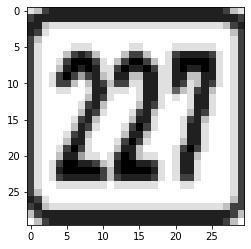

In [148]:
import numpy as np
# resized_verilog.mem as input.. process in SV.. and write in conv1
fp1 = np.loadtxt(r'C:\Users\jujare\Desktop\kushal\Peashon\HWaccel\FromSV\conv1_op.mem')
print(fp1.shape)
verilog_conv_op1 = np.reshape(fp1, (30,30))
print(verilog_conv_op1.shape)
plt.imshow(verilog_conv_op1, cmap = plt.cm.gray)

(784,)
(28, 28)


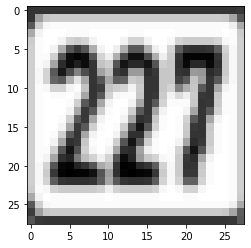

In [149]:
# conv1.mem as input.. process in SV.. and write in conv2

fp2 = np.loadtxt(r'C:\Users\jujare\Desktop\kushal\Peashon\HWaccel\FromSV\conv2_op.mem')
print(fp2.shape)
verilog_conv_op2 = np.reshape(fp2, (28,28))
print(verilog_conv_op2.shape)
plt.imshow(verilog_conv_op2, cmap = plt.cm.gray)